#  Analyzing Factors Affecting Used Car Prices Using Python

### Importing Libraries

In [3]:
import pandas as pd

In [2]:
import numpy as np

In [38]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

## Loading DATA SET

In [6]:
import pandas as pd

In [4]:
df=pd.read_csv("train.CSV")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


## Checking structure of a Data set

### Size of a data set

In [13]:
df.shape

(5847, 14)

### Total columns in data set

In [14]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

### structure + missing values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-null   object 
 9   Engine             5811 non-null   object 
 10  Power              5811 non-null   object 
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 639.6+ KB


### converting columns to Numeric (removing text units)

In [11]:
df["Mileage"] = df["Mileage"].str.replace(" kmpl","")
df["Mileage"] = pd.to_numeric(df["Mileage"], errors="coerce")

df["Engine"] = df["Engine"].str.replace(" CC","")
df["Engine"] = pd.to_numeric(df["Engine"], errors="coerce")

df["Power"] = df["Power"].str.replace(" bhp","")
df["Power"] = pd.to_numeric(df["Power"], errors="coerce")

In [12]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,NaN,1199.0,88.70,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5842 non-null   float64
 9   Engine             5811 non-null   float64
 10  Power              5811 non-null   float64
 11  Seats              5809 non-null   float64
 12  New_Price          815 non-null    object 
 13  Price              5847 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 639.6+ KB


### Statistical summary of numerical columns

In [18]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,5847.000000,5847.000000,5.847000e+03,5809.000000,5847.000000
mean,3013.181461,2013.448435,5.841013e+04,5.286452,9.653742
std,1736.398890,3.194949,9.237971e+04,0.806668,11.275966
min,1.000000,1998.000000,1.710000e+02,2.000000,0.440000
25%,1509.500000,2012.000000,3.346750e+04,5.000000,3.550000
50%,3015.000000,2014.000000,5.257600e+04,5.000000,5.750000
75%,4517.500000,2016.000000,7.249050e+04,5.000000,10.250000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


### Data cleaning  
#### cheking missing (empty/NAN) values

In [19]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

In [40]:
df.drop('New_Price',axis=1,inplace=True)

In [41]:
df.columns

Index(['Serial_No', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

#### Filling missing values (using Meadian)

In [16]:
nums_cols = ["Mileage","Engine","Power","Seats"]


In [19]:
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [20]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.19,1199.0,88.70,5.0,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


### Removes Duplicate coloums 
df = df.loc[:, ~df.columns.duplicated()]



In [42]:
df.head()

,Serial_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
1,1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,4.50
2,2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
3,3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
4,4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50


In [32]:
print(df.columns)


Index(['Serial_No', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')


### removing Unamed column(extra coloumn)

In [10]:
df = df.drop(columns=["Unnamed: 0"])


In [43]:
df.head()

,Serial_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
1,1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,4.50
2,2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
3,3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
4,4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50


### Checking duplicate values

In [21]:
df.duplicated().sum()

np.int64(0)

## Sales and Price Analysis

In [44]:
df.head()

,Serial_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
1,1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,4.50
2,2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
3,3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
4,4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50


## Top 10 Most expensive car

shows which car have the highest resale value


In [45]:
df.sort_values('Price', ascending=False).head(10)
df.head()

,Serial_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
1,1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,4.50
2,2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
3,3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
4,4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50


### Top 10 cheapest car 
shows Budget friendly options

In [46]:
df.sort_values('Price').head(10)
df.head()

,Serial_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
1,1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,4.50
2,2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
3,3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
4,4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50


### TOP selling cars

In [35]:
df['Name'].value_counts().head(10)


Name
Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Honda City 1.5 S MT           34
Maruti Swift Dzire VDI        34
Maruti Ritz VDi               30
Hyundai i10 Sportz            30
Toyota Fortuner 3.0 Diesel    29
Honda Amaze S i-Dtech         27
Hyundai Grand i10 Sportz      27
Maruti Ertiga VDI             25
Name: count, dtype: int64

### Visualization

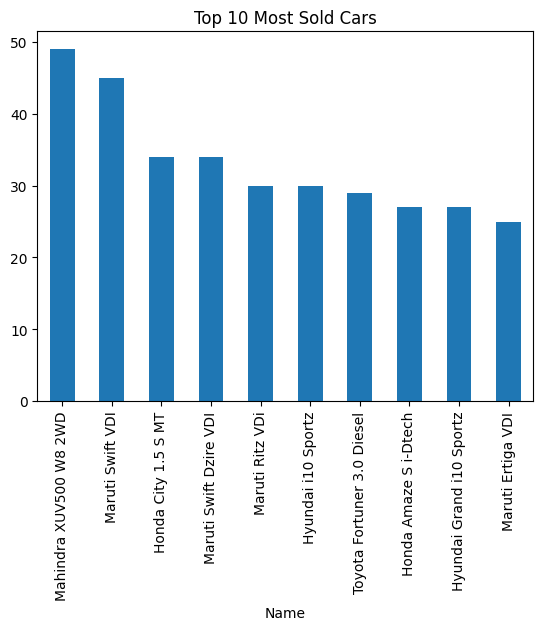

In [39]:
top_cars = df['Name'].value_counts().head(10)

top_cars.plot(kind='bar')
plt.title("Top 10 Most Sold Cars")
plt.show()


### Brand With Highest Average Price

In [49]:
df.groupby('Name')['Price'].mean().sort_values(ascending=False).head(10)



Name
Land Rover Range Rover 3.0 Diesel LWB Vogue    160.000
Lamborghini Gallardo Coupe                     120.000
Jaguar F Type 5.0 V8 S                         100.000
BMW 7 Series 740Li                              93.335
Mercedes-Benz SLK-Class 55 AMG                  90.000
Land Rover Range Rover Sport SE                 80.910
Mercedes-Benz GLS 350d Grand Edition            79.000
Mercedes-Benz E-Class E 350 d                   78.800
Jaguar XJ 3.0L Portfolio                        77.000
Jaguar XJ 2.0L Portfolio                        75.000
Name: Price, dtype: float64

### Average price by fuel type

In [50]:
df.groupby('Fuel_Type')['Price'].mean()


Fuel_Type
Diesel      12.960686
Electric    12.875000
Petrol       5.756688
Name: Price, dtype: float64

### Most Recent cars (Latetest models)

In [51]:
df.sort_values('Year', ascending=False).head(10)


,Serial_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4290,4290,Mercedes-Benz New C-Class C220 CDI Executive E...,Kochi,2019,17320,Diesel,Automatic,First,15.8 kmpl,2148 CC,170 bhp,5.0,37.99
4305,4305,Maruti Alto 800 2016-2019 LXI Optional,Jaipur,2019,3000,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,3.50
4319,4319,Toyota Innova Crysta 2.8 GX AT,Kochi,2019,14076,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,19.40
1743,1743,Toyota Etios Liva 1.2 VX Dual Tone,Coimbatore,2019,20877,Petrol,Manual,First,18.16 kmpl,1197 CC,78.9 bhp,5.0,7.27
1762,1762,Hyundai i20 1.2 Magna Executive,Kochi,2019,27339,Petrol,Manual,First,18.6 kmpl,1197 CC,81.83 bhp,5.0,6.27
976,976,Ford Ecosport Signature Edition Diesel,Coimbatore,2019,23154,Diesel,Manual,First,23.0 kmpl,1498 CC,98.96 bhp,5.0,11.65
417,417,Renault Captur 1.5 Diesel RXL,Coimbatore,2019,24950,Diesel,Manual,First,20.37 kmpl,1461 CC,108.45 bhp,5.0,13.37
4921,4921,Land Rover Discovery Sport SD4 HSE Luxury 7S,Coimbatore,2019,17201,Diesel,Automatic,First,12.51 kmpl,2179 CC,187.7 bhp,7.0,58.91
5516,5516,Mercedes-Benz CLA 200 D Sport Edition,Coimbatore,2019,15976,Diesel,Automatic,First,17.9 kmpl,2143 CC,136 bhp,5.0,36.76
2251,2251,Mercedes-Benz E-Class E 350 d,Coimbatore,2019,9312,Diesel,Automatic,First,18.0 kmpl,2987 CC,258 bhp,5.0,78.80


### Oldesr Car in Dataset

In [52]:
df.sort_values('Year').head(10)


,Serial_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
5558,5558,Maruti Zen LX,Jaipur,1998,95150,Petrol,Manual,Third,17.3 kmpl,993 CC,60 bhp,5.0,0.53
3630,3630,Mercedes-Benz E-Class 250 D W 210,Mumbai,1998,55300,Diesel,Automatic,First,10.0 kmpl,1796 CC,157.7 bhp,5.0,3.90
3039,3039,Maruti Zen LXI,Jaipur,1998,95150,Petrol,Manual,Third,17.3 kmpl,993 CC,60 bhp,5.0,0.45
1185,1185,Maruti Zen VX,Jaipur,1999,70000,Petrol,Manual,Second,17.3 kmpl,993 CC,60 bhp,5.0,0.77
1791,1791,Honda City 1.3 EXI,Pune,1999,140000,Petrol,Manual,First,13.0 kmpl,1343 CC,90 bhp,5.0,0.90
302,302,Tata Sumo Delux,Hyderabad,2000,158000,Diesel,Manual,Second,14.07 kmpl,2956 CC,83.1 bhp,7.0,1.50
5758,5758,Maruti 800 DX BSII,Pune,2000,78000,Petrol,Manual,First,16.1 kmpl,796 CC,37 bhp,4.0,0.55
592,592,Mahindra Bolero ZLX BSIII,Kolkata,2000,124000,Diesel,Manual,First,13.6 kmpl,2523 CC,63 bhp,7.0,1.95
4990,4990,Maruti Zen VXi - BS III,Jaipur,2000,90000,Petrol,Manual,Second,17.3 kmpl,993 CC,60 bhp,5.0,0.70
3686,3686,Honda City 1.5 EXI,Pune,2001,125943,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,5.0,1.45


### Cars with HIghest Mileage 

In [53]:
df.sort_values('Mileage', ascending=False).head(10)


,Serial_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
537,537,Audi TT 2.0 TFSI,Delhi,2013,12100,Petrol,Automatic,First,9.9 kmpl,1984 CC,207.8 bhp,2.0,29.50
1247,1247,Audi TT 2.0 TFSI,Kochi,2014,14262,Petrol,Automatic,First,9.9 kmpl,1984 CC,207.8 bhp,2.0,27.35
3470,3470,Mercedes-Benz CLS-Class 2006-2010 350 CDI,Hyderabad,2010,29000,Diesel,Automatic,First,9.9 kmpl,3498 CC,271.72 bhp,4.0,32.00
4386,4386,Maruti Grand Vitara MT,Mumbai,2008,46810,Petrol,Manual,First,9.8 kmpl,1995 CC,163.5 bhp,5.0,3.95
3875,3875,Honda Accord 2.4 Inspire M/T,Mumbai,2012,42000,Petrol,Manual,First,9.8 kmpl,2354 CC,180 bhp,5.0,6.25
5453,5453,Honda Accord 2.4 Inspire M/T,Pune,2009,79000,Petrol,Manual,Third,9.8 kmpl,2354 CC,180 bhp,5.0,3.10
4069,4069,Honda Accord 2.4 Inspire M/T,Pune,2009,60000,Petrol,Manual,Second,9.8 kmpl,2354 CC,180 bhp,5.0,3.50
4894,4894,Audi Q5 2008-2012 2.0 TFSI Quattro,Ahmedabad,2009,99100,Petrol,Automatic,Second,9.74 kmpl,1984 CC,208 bhp,5.0,10.00
5458,5458,Audi Q5 2008-2012 2.0 TFSI Quattro,Kochi,2011,59967,Petrol,Automatic,First,9.74 kmpl,1984 CC,208 bhp,5.0,18.00
857,857,Maruti Grand Vitara AT,Chennai,2008,77000,Petrol,Automatic,Fourth & Above,9.7 kmpl,1995 CC,163.5 bhp,5.0,5.50


### Top 5 brand by Total Market value

In [55]:
df.groupby('Name')['Price'].sum().sort_values(ascending=False).head(5)


Name
Mercedes-Benz GLE 350d                                   506.60
Jaguar XF 2.2 Litre Luxury                               440.10
Audi Q7 3.0 TDI Quattro Premium Plus                     423.66
Mahindra XUV500 W8 2WD                                   418.44
Mercedes-Benz New C-Class C 220d Avantgarde Edition C    379.35
Name: Price, dtype: float64

## MATPLOTLIB AND SEABORN VISUALIZATION 

### Top 10 Most sold Cars (BAR CHART)

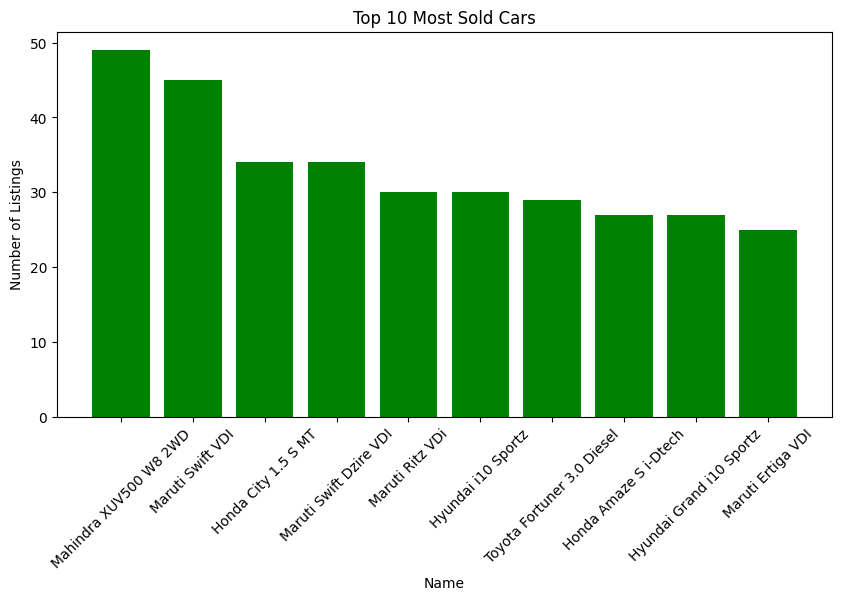

In [6]:
import matplotlib.pyplot as plt

top_sold = df['Name'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top_sold.index, top_sold.values, color='green')
plt.xticks(rotation=45)
plt.title("Top 10 Most Sold Cars")
plt.xlabel("Name")
plt.ylabel("Number of Listings")
plt.show()


## Top 10 most Expensive Car (BAR CHART)

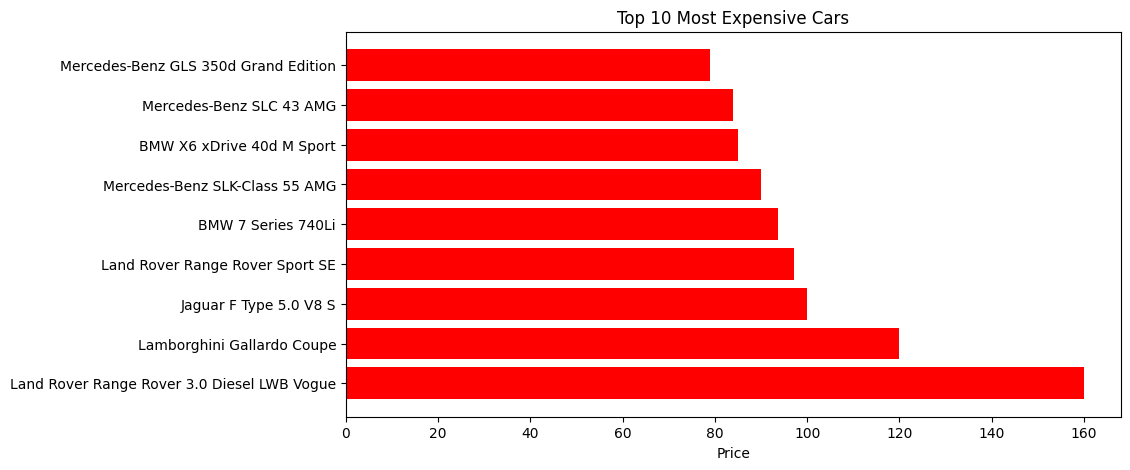

In [7]:
top_expensive = df.sort_values('Price', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top_expensive['Name'], top_expensive['Price'],color='red')
plt.title("Top 10 Most Expensive Cars")
plt.xlabel("Price")
plt.show()


In [ ]:
### Average price by Brand (car)

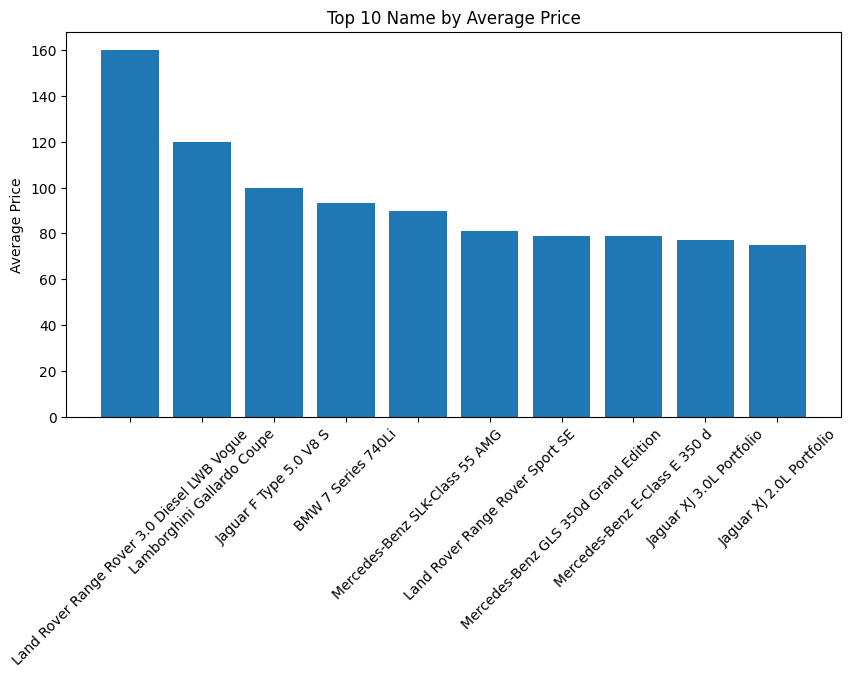

In [60]:
brand_avg = df.groupby('Name')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(brand_avg.index, brand_avg.values)
plt.xticks(rotation=45)
plt.title("Top 10 Name by Average Price")
plt.ylabel("Average Price")
plt.show()


### price VS year (TREND LINE)


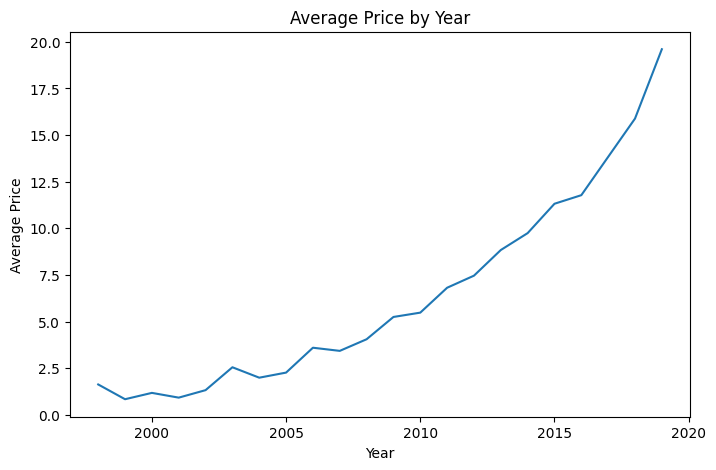

In [61]:
price_year = df.groupby('Year')['Price'].mean()

plt.figure(figsize=(8,5))
plt.plot(price_year.index, price_year.values)
plt.title("Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()


### Price Distribution( Histogram)

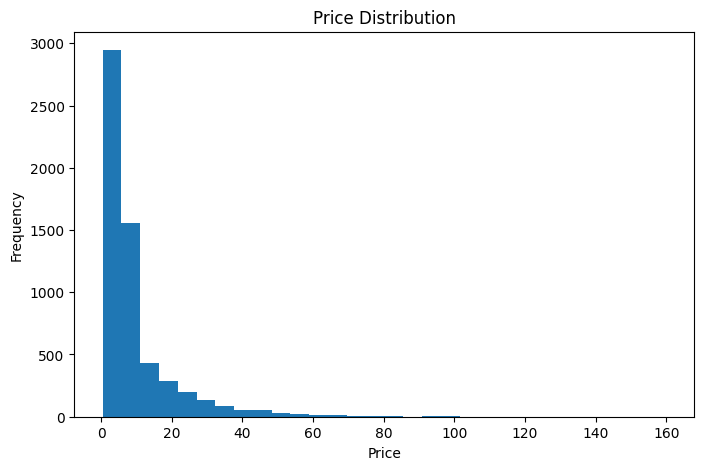

In [75]:
plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


 ### Fuel type distribution (PIE CHART)

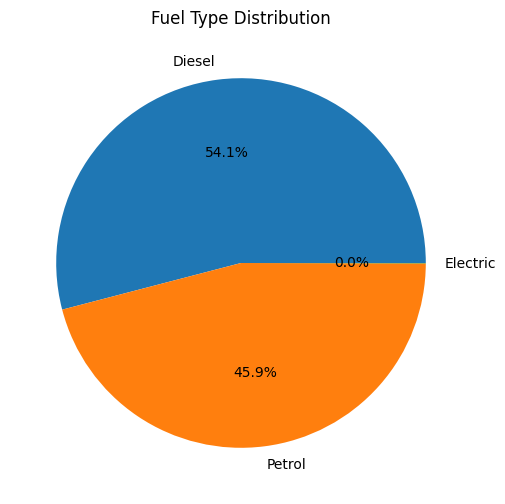

In [76]:
fuel_counts = df['Fuel_Type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%')
plt.title("Fuel Type Distribution")
plt.show()


### Car by Average Price

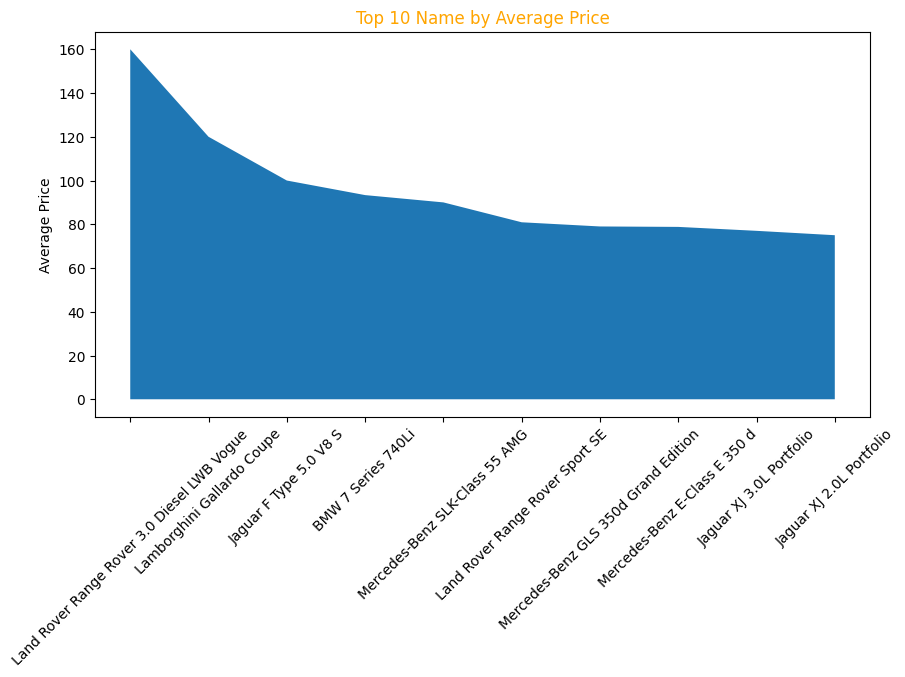

In [8]:
brand_avg = df.groupby('Name')['Price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.fill_between(brand_avg.index, brand_avg.values)
plt.xticks(rotation=45)
plt.title("Top 10 Name by Average Price")
plt.ylabel("Average Price")
plt.show()


In [66]:
import seaborn as sns


### Top 10 Most Sold Cars (Seaborn)

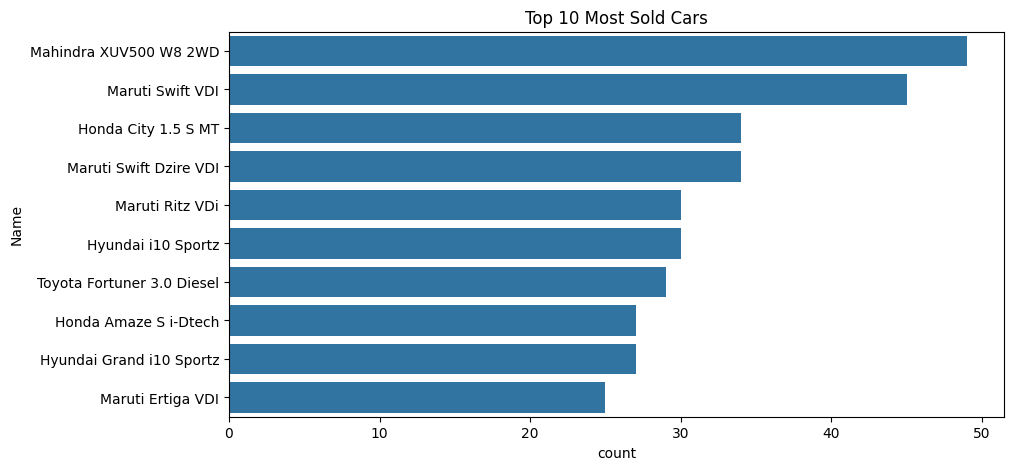

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(y='Name',
              data=df,
              order=df['Name'].value_counts().head(10).index)
plt.title("Top 10 Most Sold Cars")
plt.show()


### Fuel Type vs Price (Boxplot)

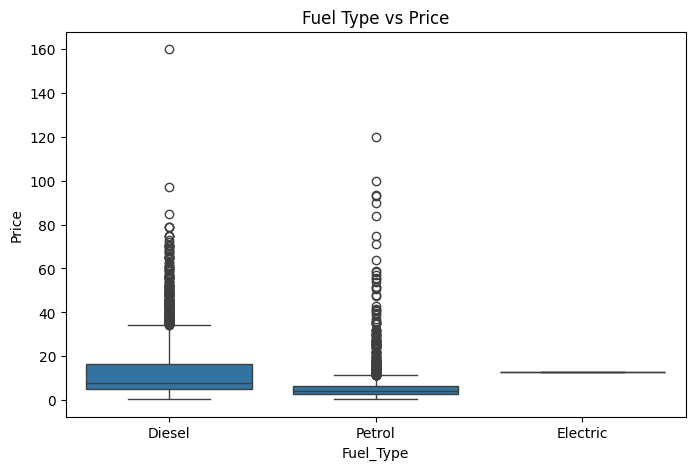

In [72]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title("Fuel Type vs Price")
plt.show()


### Transmission vs Price

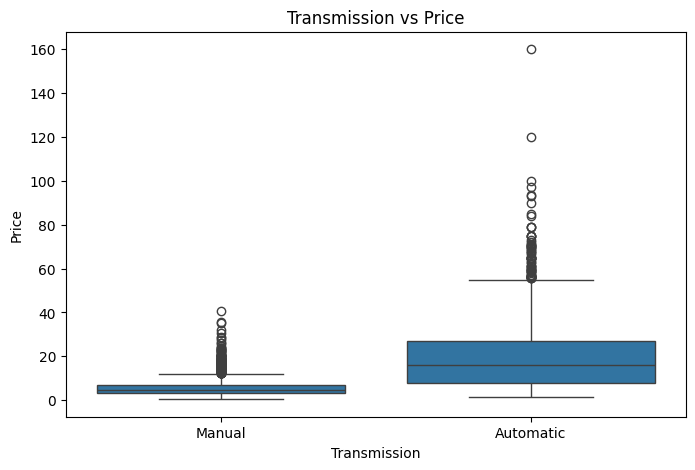

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title("Transmission vs Price")
plt.show()
